In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from sklearn.metrics import roc_curve, auc

In [2]:
# Data source path 
data_source_path = "../../DATA/"

In [3]:
# Import data
X = pd.read_csv(data_source_path+'clean_data/smart_soft_cleaning.csv', sep=";", index_col=0)
y = pd.read_csv(data_source_path+'output_train.csv', sep=";", index_col=0)

not_null_indexes = X['question'].notnull()
X = X[not_null_indexes]
y = y[not_null_indexes]

features = X.columns
targets = y['intention'].unique()

In [10]:
X[y['intention'] == 42] 

,question
11,psy dit prendre composition medicament matin e...
27,combien prendre medicament
29,bonjour depuis presque an être sous medicament...
62,medicament medicament composition medicament p...
68,stérol seulement pour les adultes
102,quelle être dose optimale dexorat
104,prenez combien composition seroquel
172,bonjour être actuellement sous medicament comp...
204,être que dose medicament être pas trop faible
269,être qu en medicament qui avoir déjà réussi à ...


In [5]:
targets

array([28, 31, 44, 48, 22, 23, 42, 32, 26,  0, 34, 14,  7, 37,  4, 11, 24,
       40, 46, 30,  8, 38, 13, 21, 15, 27,  5, 33,  6, 25,  1, 50, 43, 45,
       39, 29, 19, 12, 47, 20,  9, 10, 41, 49, 18, 17,  2, 36, 16, 35,  3])

In [6]:
vectorizer = TfidfVectorizer(min_df=1,ngram_range=(1,2))
X_vectors = vectorizer.fit_transform(X['question'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_vectors,y['intention'], random_state = 42)

In [8]:
y_train = y_train.reshape(6021,1)

## ExtraTree classification

In [39]:
#instantiate classifier and vectorizer
#clf=MultinomialNB(alpha=.01)
clf = GaussianNB()
#Train classifier
clf.fit(X_train.toarray(), y_train)

print(clf.score(X_test, y_test))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [ ]:
#Train classifier
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

In [32]:
y_predict = clf.predict(X = X_test)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


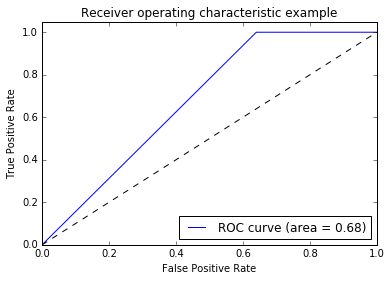

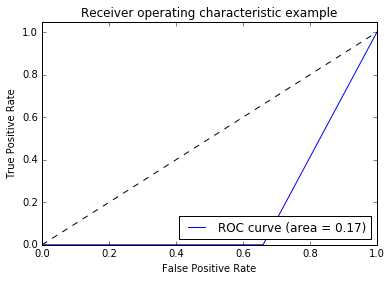

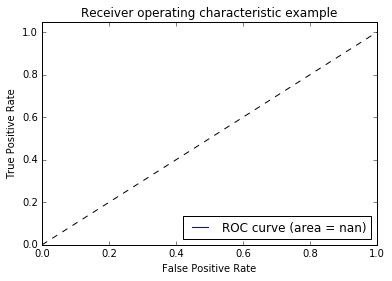

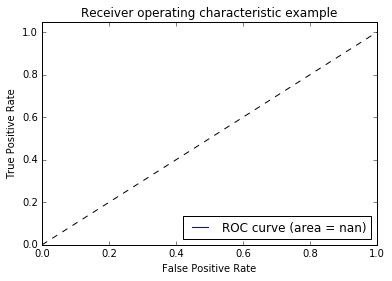

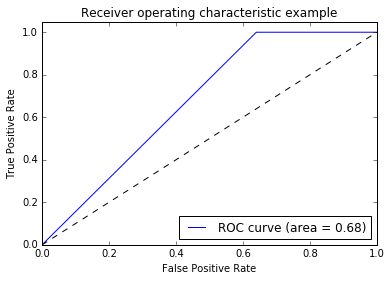

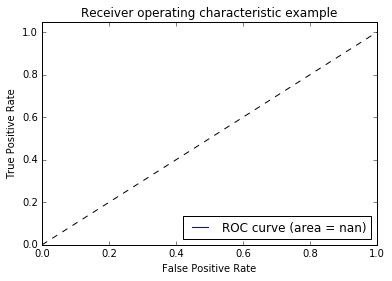

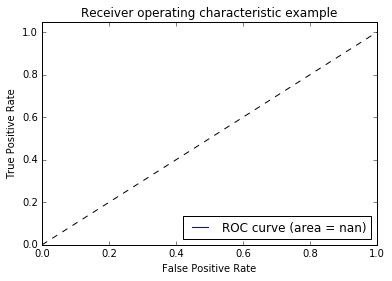

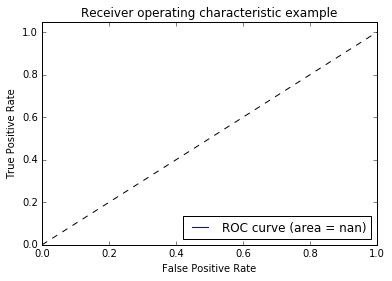

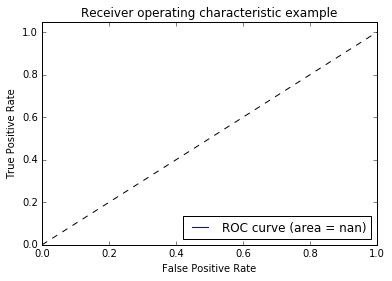

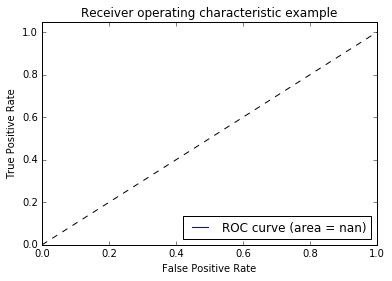

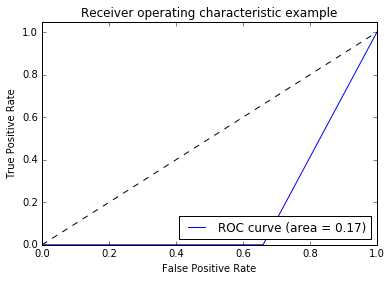

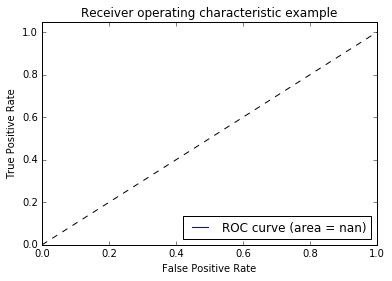

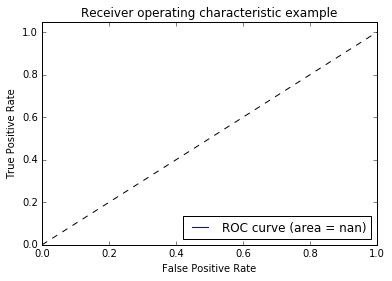

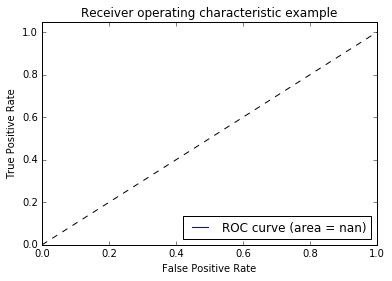

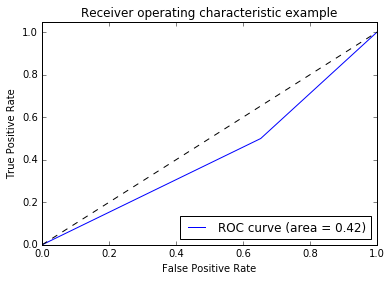

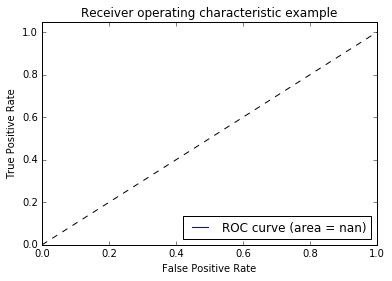

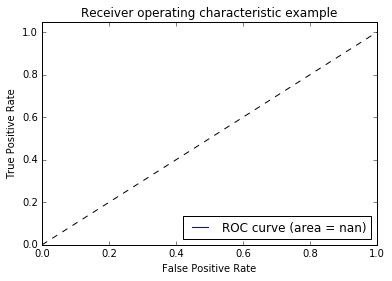

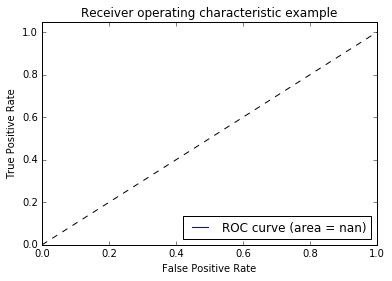

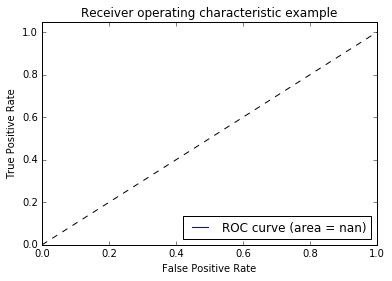

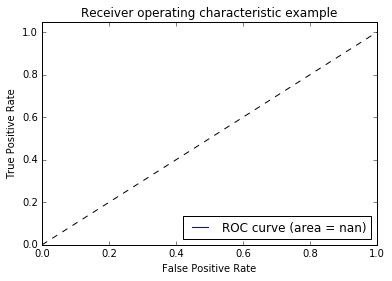

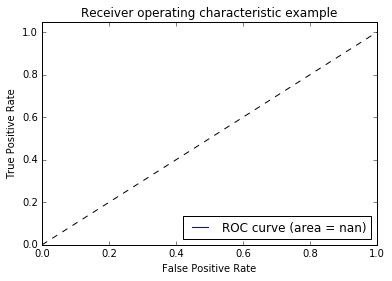

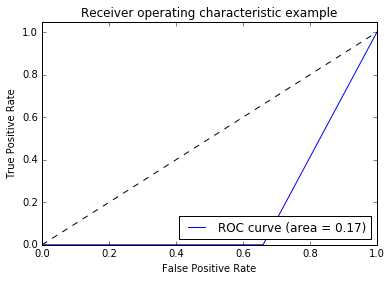

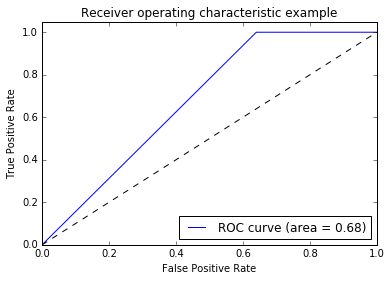

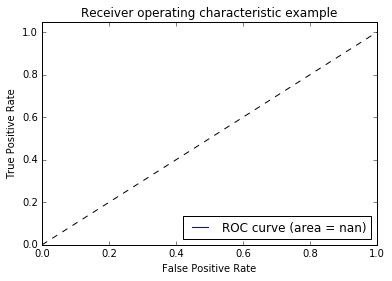

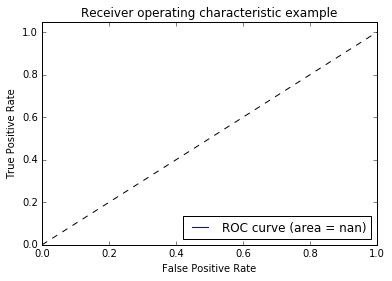

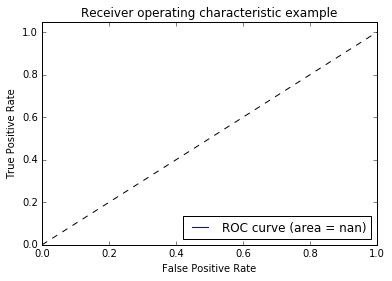

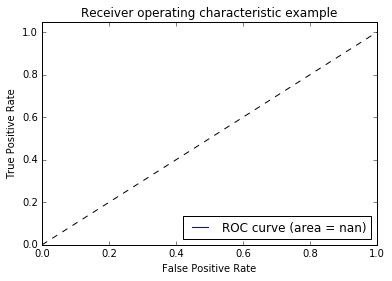

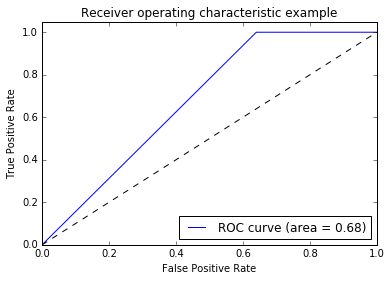

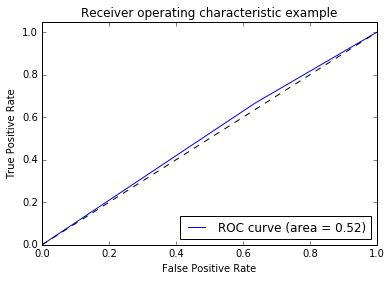

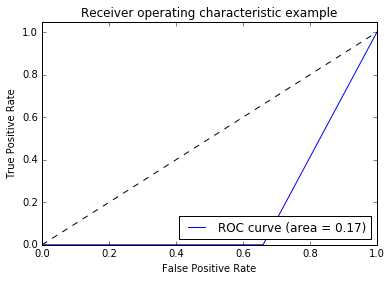

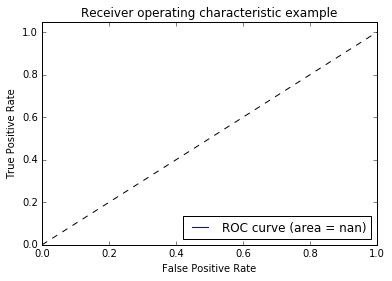

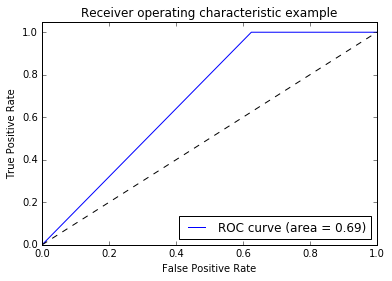

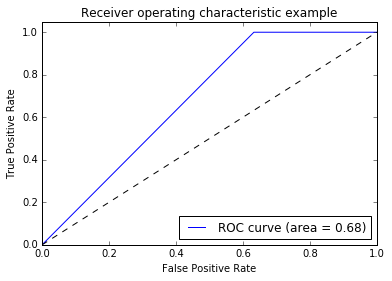

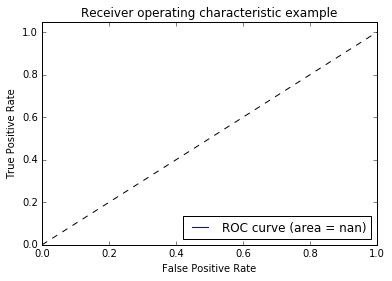

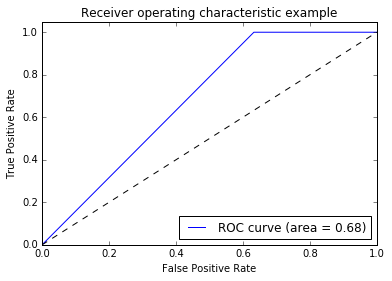

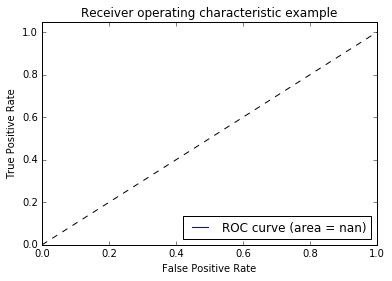

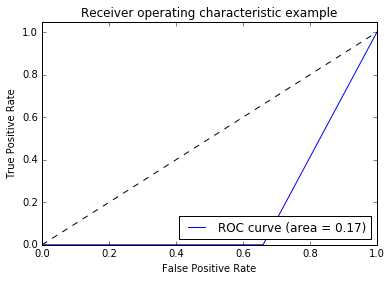

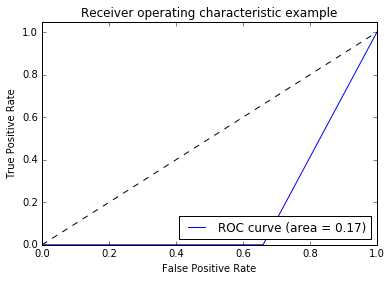

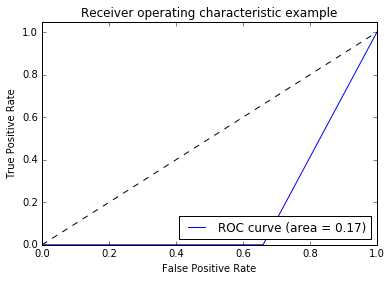

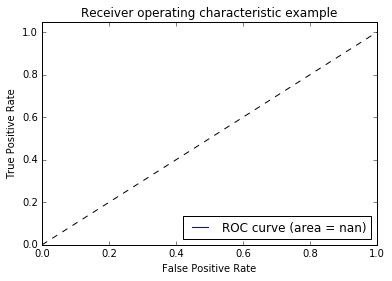

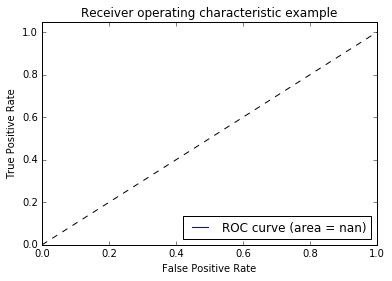

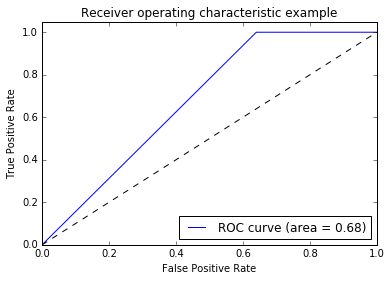

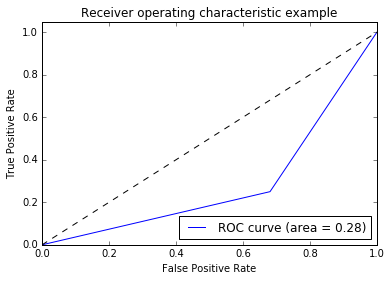

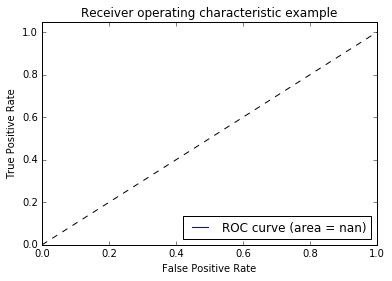

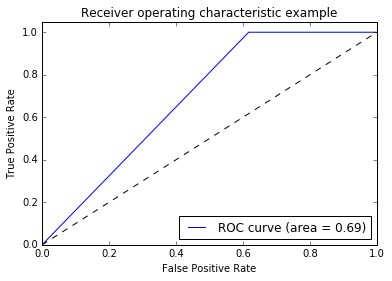

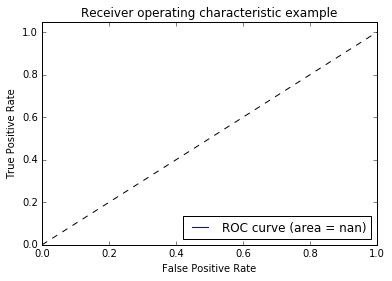

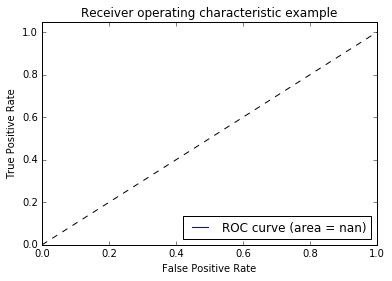

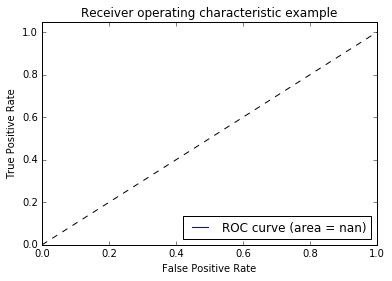

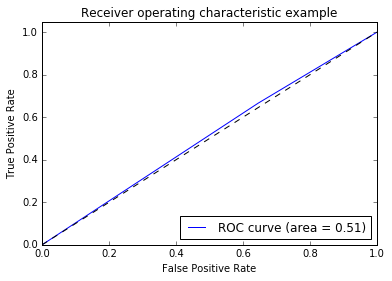

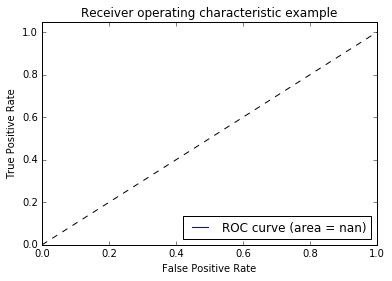

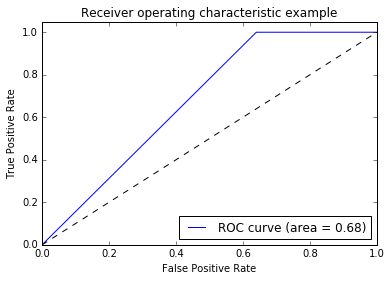

In [11]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(targets)):
    y_test_roc = []
    y_score = []
    for j in range(len(targets)):
        y_test_roc.append([(0,1)[y_test.values[j]==i]])
        y_score.append([(0,1)[y_test.values[j]==y_predict[j]]])
    fpr[i], tpr[i], _ = roc_curve(y_test_roc, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(len(targets)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [13]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'false_positive_rate' is not defined